<a href="https://colab.research.google.com/github/Avupati-Sai-Likhitha/Image-Classification/blob/main/Image_Classification_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries and modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os

**Preprocessing Images**

In [ ]:
dir = '/content/drive/MyDrive/ML/Images'

categories = ['Mango','Brinjal'] 
target = []
images = []
flat_data = []

for i in categories:
  num = categories.index(i)
  path = os.path.join(dir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) 
    # Flattening images
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
print(flat_data[0])
print(target)

[0.82745098 0.8627451  0.65294118 ... 0.54117647 0.42745098 0.39019608]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<BarContainer object of 2 artists>

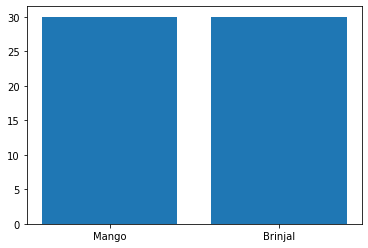

In [ ]:
unique, count = np.unique(target,return_counts=True)
plt.bar(categories,count)

**Creating Dataframe**

In [ ]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.827451,0.862745,0.652941,0.839216,0.870588,0.692157,0.848039,0.882353,0.711765,0.854902,0.882353,0.749020,0.858824,0.886275,0.771569,0.845098,0.879412,0.787255,0.835294,0.870588,0.788235,0.842157,0.877451,0.795098,0.856863,0.894118,0.803922,0.870588,0.909804,0.809804,0.882353,0.909804,0.819608,0.877451,0.906863,0.812745,0.867647,0.899020,0.804902,0.857843,...,0.435294,0.197059,0.023529,0.434314,0.199020,0.023529,0.433333,0.199020,0.023529,0.437255,0.196078,0.021569,0.454902,0.207843,0.011765,0.442157,0.197059,0.016667,0.411765,0.178431,0.026471,0.398039,0.165686,0.016667,0.337255,0.135294,0.019608,0.273529,0.106863,0.019608,0.309804,0.123529,0.028431,0.417647,0.194118,0.052941,0.541176,0.427451,0.390196,0
1,0.121569,0.121569,0.121569,0.199722,0.200039,0.199722,0.339869,0.351634,0.355556,0.618431,0.628710,0.661569,0.682353,0.690196,0.733333,0.678431,0.686275,0.722314,0.676631,0.682353,0.721569,0.690196,0.690569,0.733333,0.698039,0.701961,0.751242,0.694118,0.698039,0.749020,0.566667,0.565490,0.609804,0.191895,0.207582,0.231285,0.086275,0.098693,0.117647,0.082353,...,0.780392,0.780392,0.780392,0.776471,0.776471,0.776471,0.775725,0.775725,0.775725,0.779647,0.779647,0.779647,0.793111,0.793111,0.793111,0.811020,0.811020,0.814941,0.823529,0.821408,0.838471,0.837306,0.834549,0.847059,0.843137,0.843137,0.854678,0.847059,0.843137,0.862745,0.847059,0.843137,0.862745,0.835369,0.835369,0.854902,0.835294,0.831373,0.850980,0
2,0.866013,0.408876,0.248521,0.566203,0.240248,0.133797,0.442913,0.173322,0.127845,0.425386,0.173477,0.153216,0.423889,0.169556,0.166562,0.464327,0.168627,0.185242,0.442209,0.152013,0.159083,0.627660,0.270693,0.302634,0.792810,0.471346,0.513556,0.811765,0.590850,0.634486,0.811765,0.621000,0.664137,0.811765,0.634656,0.664102,0.811266,0.648261,0.664601,0.824458,...,0.843137,0.659752,0.761712,0.844065,0.628758,0.744978,0.837255,0.397575,0.536791,0.778810,0.126902,0.260081,0.767545,0.233009,0.364915,0.752941,0.337150,0.464137,0.698314,0.211765,0.314000,0.609305,0.250826,0.253370,0.518680,0.307484,0.231941,0.421020,0.355007,0.228863,0.376041,0.335399,0.206915,0.414654,0.349484,0.238647,0.443137,0.344444,0.262745,0
3,0.854902,0.768627,0.705882,0.850980,0.764706,0.701961,0.850980,0.764706,0.701961,0.841176,0.756863,0.694118,0.829412,0.756863,0.701961,0.823529,0.752941,0.698039,0.823529,0.752941,0.698039,0.823529,0.752941,0.698039,0.827451,0.756863,0.701961,0.827451,0.756863,0.705882,0.811765,0.756863,0.717647,0.807843,0.756863,0.721569,0.794118,0.756863,0.729412,0.784314,...,0.876471,0.911765,0.939216,0.872549,0.907843,0.935294,0.874510,0.909804,0.937255,0.869608,0.904902,0.932353,0.866667,0.901961,0.929412,0.860784,0.896078,0.923529,0.850980,0.886275,0.913725,0.850980,0.886275,0.913725,0.856863,0.892157,0.919608,0.856863,0.892157,0.919608,0.856863,0.892157,0.919608,0.839216,0.891176,0.900000,0.837255,0.890196,0.898039,0
4,0.418954,0.321569,0.007843,0.427451,0.328758,0.007190,0.405229,0.313725,0.007843,0.385948,0.307843,0.011765,0.362745,0.288235,0.003922,0.343137,0.264706,0.007843,0.319608,0.243137,0.000327,0.307516,0.229412,0.001961,0.278431,0.209804,0.003922,0.239216,0.192157,0.007843,0.351634,0.275490,0.052288,0.548693,0.397386,0.095425,0.560458,0.391830,0.057190,0.570588,...,0.527124,0.439216,0.105882,0.549020,0.450980,0.121569,0.549020,0.447059,0.118301,0.549020,0.443137,0.125490,0.545098,0.439216,0.121569,0.541176,0.439216,0.131373,0.533660,0.435294,0.137255,0.537582,0.447059,0.145425,0.549020,0.454902,0.166667,0.562745,0.455229,0.186275,0.590523,0.470588,0.205882,0.592810,0.478431,0.217647,0.596078,0.478431,0.233333,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

**Applying Algorithm**

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

**Finding best parameters using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param = [
         {'C' : [1,10,100,1000], 'kernel' : ['linear']},
         {'C' : [1,10,100,1000], 'gamma' : [0.001,0.0001], 'kernel' : ['rbf']}
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)

1.0

In [ ]:
confusion_matrix(y_pred,y_test)

array([[11,  0],
       [ 0,  7]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



**Saving model**

In [ ]:
import pickle
pickle.dump(clf,open('image_model.p','wb'))

In [ ]:
model = pickle.load(open('image_model.p','rb'))

**Testing a new image**

Enter the URL for mango/brinjal images : https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2kobii_jxg6ZZXEvghsNp3t9PGHtq2MGs1w&usqp=CAU
(225, 225, 3)
Predicted output -- Brinjal


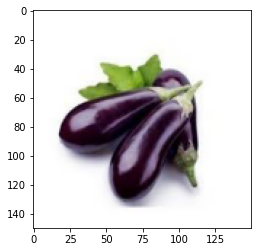

In [ ]:
flat_data = []
url = input('Enter the URL for mango/brinjal images : ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'Predicted output -- {y_out}')